In [28]:
import numpy as np
import random 

dati_1 = np.random.normal(loc = 1200, scale = 900 , size = 91)
dati_2 = np.random.normal(loc = 1000, scale = 700 , size = 91)
dati_3 = np.random.normal(loc = 800, scale = 500 , size = 91)
dati_4 = np.random.normal(loc = 600, scale = 300 , size = 92)
dati_finali = np.concatenate((dati_1, dati_2, dati_3, dati_4))
dati_finali[dati_finali < 0] = 0
dati_finali = dati_finali.astype(int)
patologie = ['testa','cuore','ossa']
list_patologie = random.choices(patologie, k= 365)
dati_finali

array([ 873, 1046, 1181,  550, 2644, 2107, 1838, 1545,    0, 1741,    0,
       2278, 1362,  437,  471, 1933, 1296, 2085, 2091,    0, 1212,    0,
        938,   62, 3153, 2692,  579, 1673,    0,  583,   13,  684, 1725,
       1772, 2679,  812, 1246,  926, 1403, 2288,    0,    0,  225, 3525,
       2817, 1510,    0, 1972,  921, 1042,    0, 1855,  402, 2058, 2068,
       1096,  251, 1719, 1207, 1547, 2463, 1006, 2363,  725, 1097, 1441,
        480,    0, 1272,    0,  316, 1168, 1820, 2233,  566, 1649, 1970,
          0, 2308,  173,    0, 1455,    0, 1642, 1341,  469, 2134,  562,
       2148, 1051, 1603, 1055, 1220, 1868,  374, 1043, 1068,  917,  491,
       1722,  853,  222,  460,    0, 1489, 2298,  673,  821,  985,  994,
       2025,    0,  153,  789, 1483, 1189, 1469, 2035, 1632, 1197,  255,
       1215,  134,  621,  681, 1131, 1024,  125, 1789,    0,  274,  619,
       1890, 1366, 1226,  284, 1724,   79, 1165, 1377,    0, 1858,    0,
       1437,  613, 1593, 2265, 1402,  989,  312,  7

In [29]:
import pandas as pd
date = pd.date_range(start="2024-01-01", periods=365, freq='D').strftime('%d-%m')

df = pd.DataFrame({'Visitatori': dati_finali,
                   'Patologia' : list_patologie}, index=date)
df


,Visitatori,Patologia
01-01,873,ossa
02-01,1046,cuore
03-01,1181,testa
04-01,550,ossa
05-01,2644,testa
...,...,...
26-12,0,cuore
27-12,946,ossa
28-12,951,cuore
29-12,661,ossa


In [34]:
media_mese = {}
std_mese = {}

for mese in range(1, 13):  
    
    mese_str = f'{mese:02d}'  
    visitatori_mese = df[df.index.str.endswith(mese_str)]['Visitatori']
    
    media_mese[mese] = visitatori_mese.mean()
    std_mese[mese] = visitatori_mese.std()

{1: 925.3322123571655,
 2: 917.9089161377195,
 3: 812.3055744216945,
 4: 624.7159354458632,
 5: 658.8033596352303,
 6: 742.8263522891284,
 7: 554.3559005874557,
 8: 412.27994977836033,
 9: 378.03773605958634,
 10: 266.3035296282667,
 11: 238.2523920107636,
 12: 288.12227808074266}

In [35]:
df['media_mobile'] = df['Visitatori'].rolling(window=7).mean()

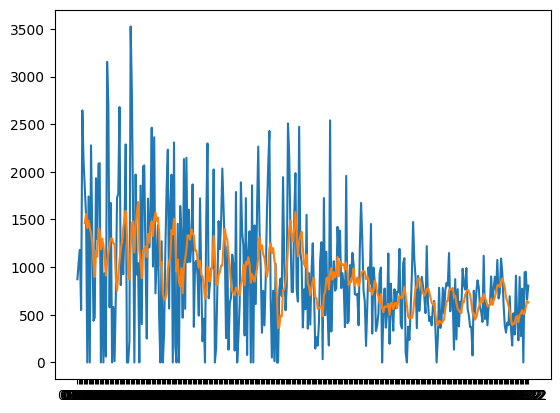

In [32]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Visitatori'], label='Visitatori')
plt.plot(df.index, df['media_mobile'])

plt.show()

In [49]:
numero_pat = df['Patologia'].value_counts()
patologia_max , num_max = numero_pat.idxmax(), numero_pat.max()
patologia_min , num_min = numero_pat.idxmin(), numero_pat.min()

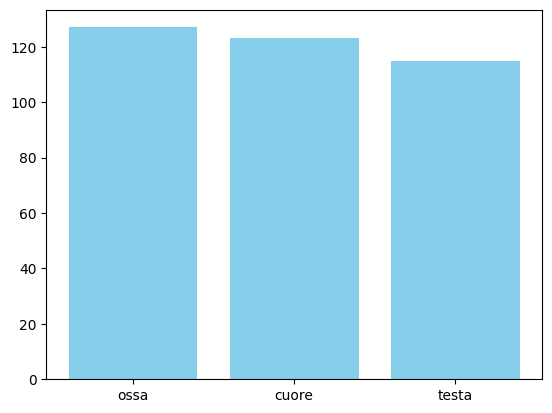

In [53]:
plt.bar(numero_pat.index, numero_pat.values, color='skyblue')
plt.show()

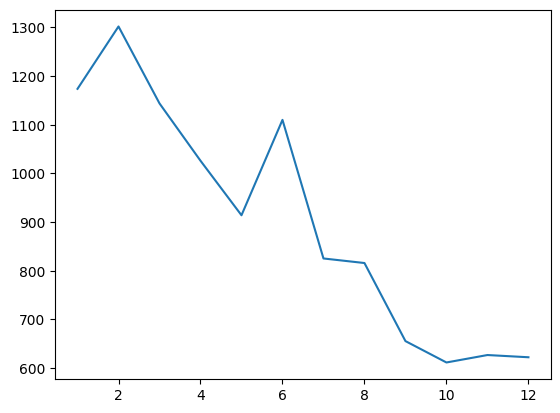

In [51]:
plt.plot(media_mese.keys() , media_mese.values(), label='Visitatori')


plt.show()